In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [1]:
print('Hello World!')

Hello World!


In [2]:
data = pd.read_csv('ready_data.csv',index_col=0)

In [4]:
data

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Devyatkino,Grazhdanskii prospekt,Akademicheskaya,...,Ploshchad Aleksandra Nevskogo-1,Elizarovskaia,Lomonosovskaia,Proletarskaia,Obukhovo,Rybackoe,metro_1km,metro_5km,metro_10km,parkings_1km
0,311480.0,131.63,0,1,2,30.082621,59.724677,42.18,39.32,36.65,...,34.54,38.56,40.41,43.51,42.04,46.67,0,0,0,47.0
1,254997.0,145.10,0,1,5,30.316138,59.911854,16.08,13.22,10.44,...,7.71,12.00,14.10,17.35,16.16,21.02,6,33,56,55.0
2,353742.0,73.50,0,1,7,30.301127,59.912368,17.50,14.62,11.85,...,9.38,13.67,15.75,19.00,17.79,22.65,1,27,55,55.0
3,190000.0,33.90,0,1,9,30.449978,59.956836,5.93,5.97,6.88,...,7.46,4.74,5.08,6.30,6.92,9.97,0,5,21,15.0
4,166667.0,89.40,0,1,5,30.325543,59.926372,14.80,11.94,9.16,...,6.64,11.05,13.21,16.49,15.37,20.24,8,34,57,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,212556.0,181.60,0,1,16,30.273171,59.963539,19.42,16.56,13.91,...,12.63,17.12,19.31,22.58,21.47,26.33,0,15,48,37.0
1063,418519.0,81.00,0,1,20,30.308223,59.904247,17.03,14.17,11.38,...,8.63,12.86,14.92,18.16,16.93,21.78,1,27,55,55.0
1064,91904.0,265.00,0,1,21,29.953560,60.091011,54.40,51.69,49.26,...,48.21,52.56,54.61,57.83,56.49,61.27,0,0,0,20.0
1065,84445.0,45.00,0,1,1,30.297156,59.956899,16.98,14.11,11.40,...,9.95,14.46,16.66,19.94,18.86,23.73,1,27,54,48.0


In [7]:
data.columns

Index(['price_per_square', 'squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude', 'Devyatkino', 'Grazhdanskii prospekt',
       'Akademicheskaya', 'Politekhnicheskaya', 'Ploshchad Muzhestva',
       'Lesnaia', 'Vyborgskaia', 'Ploshchad Lenina', 'Chernyshevskaia',
       'Ploshchad Vosstaniia', 'Vladimirskaia', 'Pushkinskaia',
       'Tekhnologicheskii institut-2', 'Baltiiskaia', 'Narvskaia',
       'Kirovskii zavod', 'Avtovo', 'Leninskii prospekt', 'Prospekt Veteranov',
       'Parnas', 'Prospekt Prosviashcheniia', 'Ozerki', 'Udelnaia',
       'Pionerskaia', 'Chernaia Rechka', 'Petropavlovskaia', 'Gorkovskaia',
       'Nevskii prospekt', 'Sennaia ploshchad', 'Tekhnologicheskii institut-1',
       'Frunzenskaia', 'Moskovskie vorota', 'Elektrosila', 'Park Pobedy',
       'Moskovskaia', 'Zvezdnaia', 'Kupchino', 'Spasskaia', 'Dostoevskaia',
       'Ligovskii prospekt', 'Ploshchad Aleksandra Nevskogo-2',
       'Novocherkasskaia', 'Ladozhskaia', 'Prospekt Bolshevik

In [3]:
data = data[['price_per_square', 'squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','metro_1km','parkings_1km']]

In [6]:
data.describe()

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Nevskii prospekt,metro_1km,parkings_1km
count,1.066000e+03,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,4.209756e+05,129.836510,0.076923,1.227017,8.960600,30.314739,59.934663,8.566876,1.025328,44.695122
std,2.138065e+06,95.730417,0.266594,0.897080,7.755558,0.101542,0.073656,8.340676,1.602907,21.438895
min,1.700000e+02,1.000000,0.000000,1.000000,1.000000,29.767554,59.707956,0.210000,0.000000,0.000000
25%,1.741100e+05,66.217500,0.000000,1.000000,3.000000,30.276738,59.898076,3.380000,0.000000,27.000000
50%,2.466440e+05,99.920000,0.000000,1.000000,6.000000,30.322282,59.936206,6.775000,0.000000,42.000000
75%,3.286675e+05,165.362500,0.000000,1.000000,13.000000,30.365453,59.985804,10.990000,1.000000,59.000000
max,4.300000e+07,530.000000,1.000000,15.000000,28.000000,30.642972,60.110679,62.240000,8.000000,120.000000


In [4]:
data.sort_values(by='price_per_square').tail(20)

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Nevskii prospekt,metro_1km,parkings_1km
489,593565.0,101.00,0,1,9,30.285793,59.965647,4.85,2,59.0
241,600000.0,50.00,0,1,5,30.313667,59.930895,1.53,6,33.0
889,625000.0,83.79,0,1,12,30.328022,60.005324,3.61,0,74.0
248,650000.0,200.00,0,1,5,30.286251,59.964386,4.78,2,62.0
659,653141.0,79.60,0,1,3,30.321833,59.943467,0.73,6,20.0
577,657535.0,73.00,1,1,1,30.317808,59.930561,1.08,6,22.0
113,677000.0,1.00,0,1,1,30.320467,59.917218,1.20,6,37.0
983,690000.0,215.90,1,1,5,30.323818,59.940389,0.46,6,18.0
918,791667.0,120.00,0,1,3,30.353112,59.936895,2.87,6,19.0
614,952180.0,472.60,0,1,5,30.308044,59.938942,2.15,1,32.0


In [4]:
data = data[data['price_per_square']>= 30000.0]

In [5]:
Q1 = data['price_per_square'].quantile(0.05)
Q3 = data['price_per_square'].quantile(0.95)

# Вычисляем межквартильный диапазон (IQR)
IQR = Q3 - Q1

# Определяем границы для обрезки
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаляем значения, находящиеся за пределами границ
data = data[(data['price_per_square'] >= lower_bound) & (data['price_per_square'] <= upper_bound)]

In [10]:
data.corr()

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Nevskii prospekt,metro_1km,parkings_1km
price_per_square,1.000000,-0.154482,0.060626,-0.077843,0.126163,-0.030569,0.018846,-0.222400,0.110312,0.064072
squares,-0.154482,1.000000,-0.012480,0.009737,-0.096149,-0.077957,0.069180,0.046191,-0.064650,0.043370
free,0.060626,-0.012480,1.000000,0.009315,-0.021119,0.053509,-0.066286,0.070179,0.067948,0.004409
current_floor,-0.077843,0.009737,0.009315,1.000000,-0.020621,0.038658,0.024500,0.008347,-0.037495,0.042456
max_floor,0.126163,-0.096149,-0.021119,-0.020621,1.000000,0.004599,0.132962,0.105805,-0.239582,-0.010979
latitude,-0.030569,-0.077957,0.053509,0.038658,0.004599,1.000000,-0.044633,-0.438538,0.108900,-0.034413
longitude,0.018846,0.069180,-0.066286,0.024500,0.132962,-0.044633,1.000000,-0.192080,-0.049268,0.157371
Nevskii prospekt,-0.222400,0.046191,0.070179,0.008347,0.105805,-0.438538,-0.192080,1.000000,-0.393518,-0.339954
metro_1km,0.110312,-0.064650,0.067948,-0.037495,-0.239582,0.108900,-0.049268,-0.393518,1.000000,0.053882
parkings_1km,0.064072,0.043370,0.004409,0.042456,-0.010979,-0.034413,0.157371,-0.339954,0.053882,1.000000


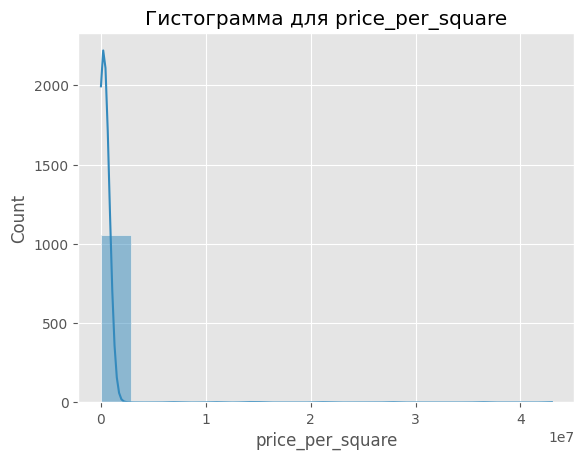

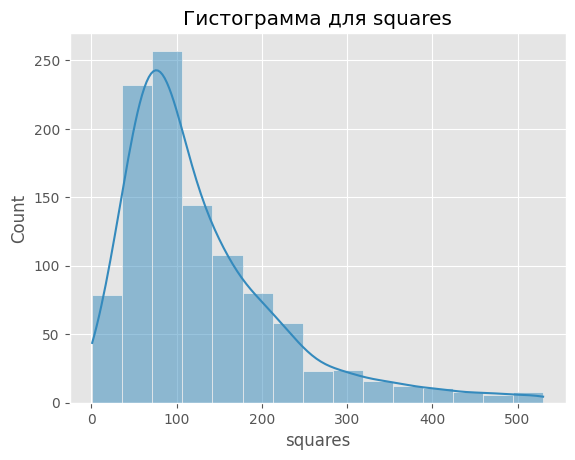

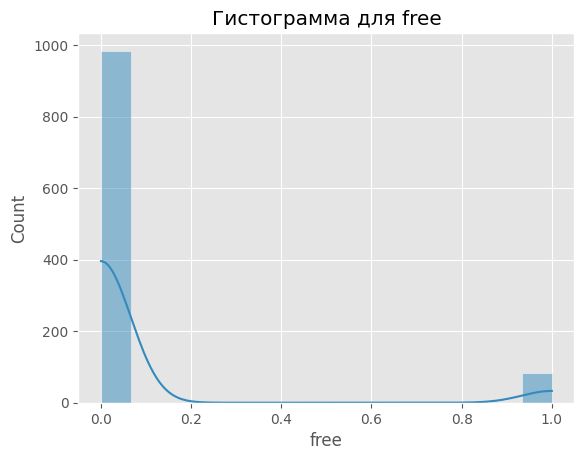

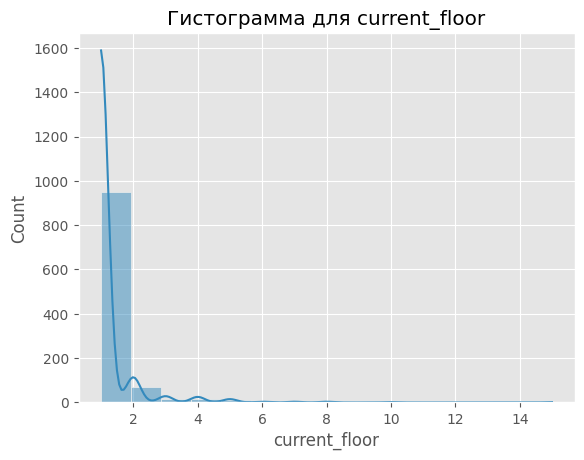

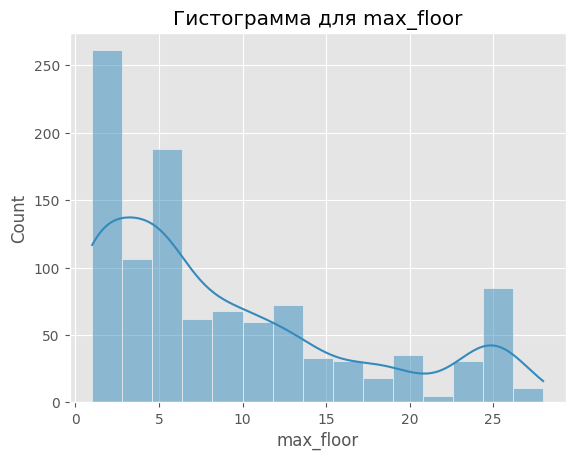

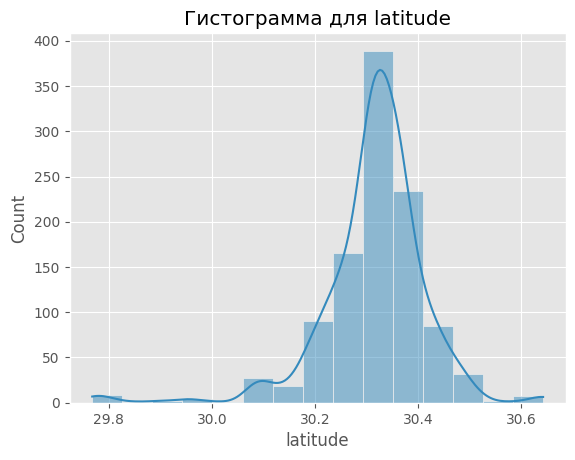

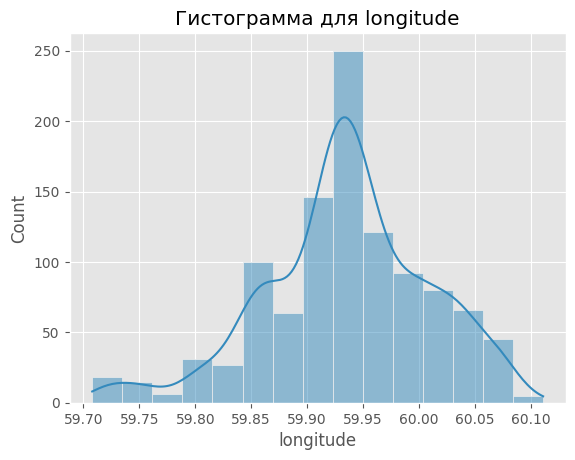

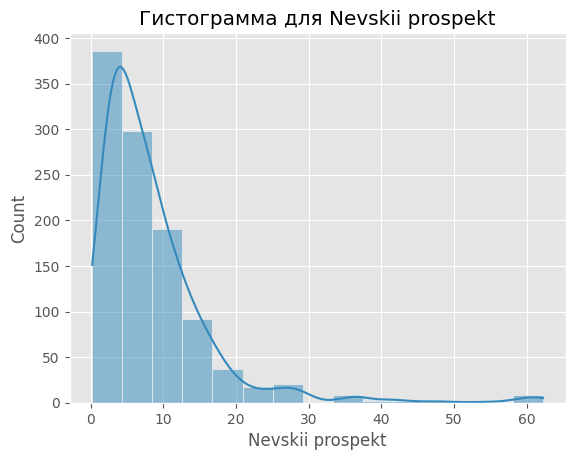

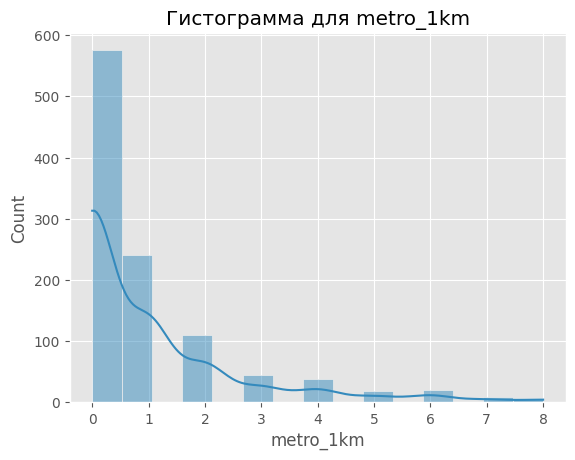

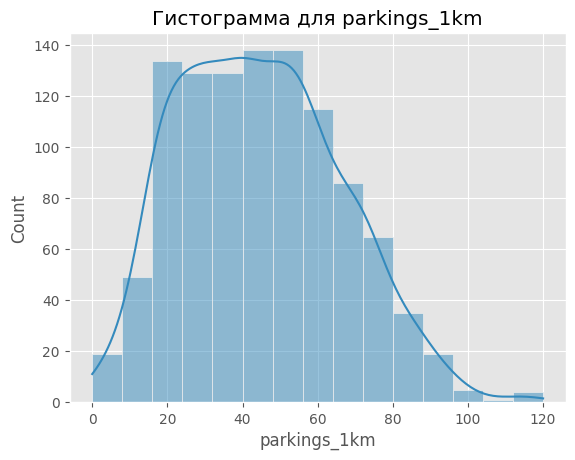

In [17]:
for column in data.columns:
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"Гистограмма для {column}")
    plt.show()

In [11]:
for i in data.columns:
    print(f"{i}:{pearsonr(data['price_per_square'], data[i])}")

price_per_square:PearsonRResult(statistic=0.9999999999999996, pvalue=0.0)
squares:PearsonRResult(statistic=-0.15448236275860827, pvalue=5.090914446010645e-07)
free:PearsonRResult(statistic=0.060625940171711426, pvalue=0.04986066988225789)
current_floor:PearsonRResult(statistic=-0.07784318968456302, pvalue=0.011748264945343792)
max_floor:PearsonRResult(statistic=0.12616300727820107, pvalue=4.243682158987548e-05)
latitude:PearsonRResult(statistic=-0.030569418415215738, pvalue=0.32305684477167457)
longitude:PearsonRResult(statistic=0.01884619872041988, pvalue=0.5424321425258505)
Nevskii prospekt:PearsonRResult(statistic=-0.22240027440210783, pvalue=3.361942508387044e-13)
metro_1km:PearsonRResult(statistic=0.11031203049524056, pvalue=0.00034880736972106493)
parkings_1km:PearsonRResult(statistic=0.06407176142234329, pvalue=0.038186441457022664)


In [12]:
data.columns

Index(['price_per_square', 'squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude', 'Nevskii prospekt', 'metro_1km',
       'parkings_1km'],
      dtype='object')

In [9]:
df_1 = data.copy()

# Определяем зависимые и не зависимые переменные
X = df_1[['squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude', 'Nevskii prospekt', 'metro_1km',
       'parkings_1km']]
y = df_1['price_per_square']

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем модель
model_1 = LinearRegression()
model_1.fit(X_scaled, y)

# Получаем коэфф. / веса параметров
coefficients = model_1.coef_
print(coefficients,'\n')

# Свободный коэф.
intercept = model_1.intercept_
print(intercept)

[-15425.81357878  11095.22047678  -7064.50333661  19328.04796374
 -23955.3463304   -6405.77804665 -41102.00182849   2097.65352345
  -5169.32719656] 

259579.21680993345


In [10]:
X = sm.add_constant(np.array(X_scaled))
est = sm.OLS(y, X)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       price_per_square   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     17.57
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           2.67e-27
Time:                        23:51:51   Log-Likelihood:                -13644.
No. Observations:                1047   AIC:                         2.731e+04
Df Residuals:                    1037   BIC:                         2.736e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.596e+05   3431.358     75.649      0.0

# IF WE MASHTABIRUEM

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop('price_per_square', axis=1)  
y = data['price_per_square'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 999)

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Создаем экземпляр класса MinMaxScaler
scaler = MinMaxScaler()

# Обучаем scaler на обучающих данных и масштабируем их
X_train_scaled = scaler.fit_transform(X_train)

# Применяем те же параметры масштабирования к тестовым данным
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

0.8993634619087335

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
kf = StratifiedKFold(n_splits=5)

In [24]:
#Find optimal number of trees
n_estimators = [50, 100, 150, 200, 250, 300, 350]
for val in n_estimators:
    score = cross_val_score(RandomForestRegressor(n_estimators= val, random_state= 42), X, y, cv = kf, scoring="neg_root_mean_squared_error")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')
#Find optimal depth
n_depth = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
for val in n_depth:
    score = cross_val_score(RandomForestRegressor(n_estimators= 100, max_depth = val, random_state= 42), X, y, cv = kf, scoring="neg_root_mean_squared_error")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')



Average score(50): -100817.127
Average score(100): -100528.824
Average score(150): -100168.840
Average score(200): -100003.493
Average score(250): -100015.058
Average score(300): -100100.525
Average score(350): -100036.687
Average score(2): -110473.051
Average score(4): -107205.306
Average score(6): -104810.778
Average score(8): -102238.271
Average score(10): -100926.163
Average score(12): -100502.783
Average score(14): -100105.438
Average score(16): -100580.270
Average score(18): -100381.423
Average score(20): -100432.976
Average score(22): -100424.209
Average score(24): -100501.846
Average score(26): -100497.482
Average score(28): -100537.229
Average score(30): -100528.824


In [15]:
rfc = RandomForestRegressor(n_estimators=300,max_depth=None)
rfc.fit(X, y)
display(rfc.score(X, y))

0.9076715196655111

In [17]:
predictions = rfc.predict(X_test)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)
print(mean_absolute_error(y_test, predictions))
print(mean_absolute_percentage_error(y_test, predictions))

35281.48975758964
23196.93109357203
0.13358587281938203


In [18]:
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [22]:
display(rfc.score(X_train, y_train))
display(rfc.get_params())
display(rfc.)

0.9008112753291593

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
predictions1 = rfc.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions1))
print(rmse)
print(mean_absolute_error(y_train, predictions1))
print(mean_absolute_percentage_error(y_train, predictions1))

37437.46885988044
24745.85276767125
0.12327887115465556


In [27]:
predictions2 = rfc.predict(X)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y, predictions2))
print(rmse)
print(mean_absolute_error(y, predictions2))
print(mean_absolute_percentage_error(y, predictions2))

79170.41019045202
49246.43084499932
0.26575826713782313


In [48]:
data

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Nevskii prospekt,metro_1km,parkings_1km
0,311480.0,131.63,0,1,2,30.082621,59.724677,28.29,0,47.0
1,254997.0,145.10,0,1,5,30.316138,59.911854,1.73,6,55.0
2,353742.0,73.50,0,1,7,30.301127,59.912368,3.13,1,55.0
3,190000.0,33.90,0,1,9,30.449978,59.956836,13.70,0,15.0
4,166667.0,89.40,0,1,5,30.325543,59.926372,0.50,8,26.0
...,...,...,...,...,...,...,...,...,...,...
1062,212556.0,181.60,0,1,16,30.273171,59.963539,6.17,0,37.0
1063,418519.0,81.00,0,1,20,30.308223,59.904247,2.64,1,55.0
1064,91904.0,265.00,0,1,21,29.953560,60.091011,41.74,0,20.0
1065,84445.0,45.00,0,1,1,30.297156,59.956899,3.52,1,48.0


In [39]:
data.dtypes

price_per_square    float32
squares             float32
free                  int32
current_floor         int32
max_floor             int32
latitude            float32
longitude           float32
Nevskii prospekt    float32
metro_1km             int32
parkings_1km        float32
dtype: object

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Defining param grid 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

## Creating a random forest regressor object
rf_regressor = RandomForestRegressor(random_state=999)
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Getting the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

Best Parameters: {'max_depth': None, 'n_estimators': 300}
Best Score (MSE): 10970270605.3773


In [28]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                  importance
longitude           0.172823
latitude            0.170534
Nevskii prospekt    0.160240
squares             0.153050
max_floor           0.139194
parkings_1km        0.108387
metro_1km           0.057232
free                0.026294
current_floor       0.012248


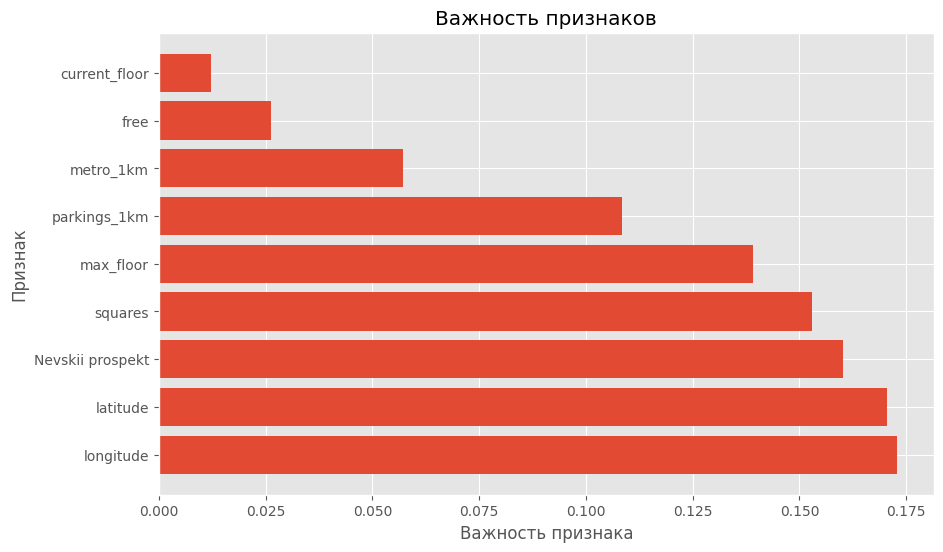

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.show()

In [41]:
from pdpbox import pdp

# Выбираем признаки, для которых хотим построить взаимодействия
all_features = data.columns.tolist()

# Визуализируем взаимодействие признаков
pdp._check_pdp_interact_plot_type(
    model=rfc1,
    dataset=data,
    model_features=all_features,
    features=all_features,
    plot_type='grid'
)


NameError: name 'rfc1' is not defined

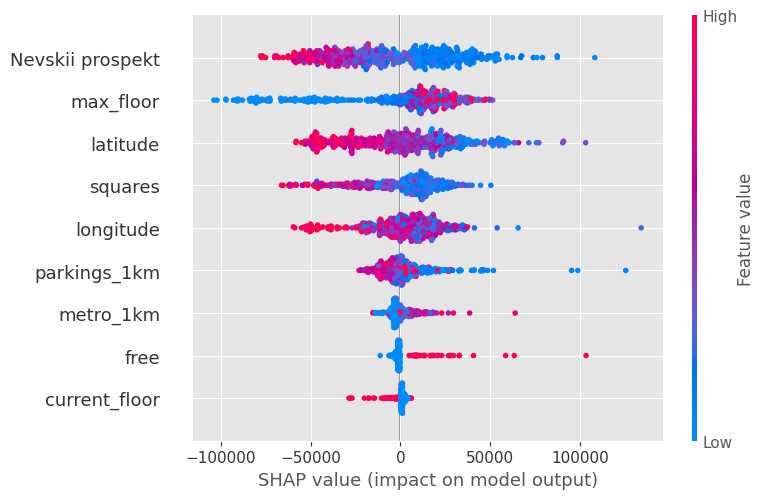

In [36]:
import shap

explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [35]:
from scipy.stats import pearsonr

for column in X_train.columns:
    correlation, p_value = pearsonr(X_train[column], y_train)
    print(f"Корреляция между {column} и целевой переменной: {correlation}, p-value: {p_value}")

Корреляция между squares и целевой переменной: -0.19699427272408024, p-value: 5.65560442554493e-06
Корреляция между free и целевой переменной: 0.05056689796440505, p-value: 0.24833792934217597
Корреляция между current_floor и целевой переменной: -0.07126639661895436, p-value: 0.10353000423094212
Корреляция между max_floor и целевой переменной: 0.09596594121218237, p-value: 0.02820095984450241
Корреляция между latitude и целевой переменной: -0.09619265960556024, p-value: 0.027829036842379792
Корреляция между longitude и целевой переменной: 0.001370355778808553, p-value: 0.9750590309426984
Корреляция между Nevskii prospekt и целевой переменной: -0.24398134281818076, p-value: 1.5864775030017922e-08
Корреляция между metro_1km и целевой переменной: 0.14948352632443887, p-value: 0.0006043004614026166
Корреляция между parkings_1km и целевой переменной: 0.06099366044411268, p-value: 0.16366959086832503


In [7]:
from wildwood import ForestRegressor


clf = ForestRegressor(random_state=200 ,n_estimators=200, max_depth=14)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]

ValueError: high is out of bounds for int32